# 이 노트의 목표
---
1. bbox좌표 설정 고민
    - 일단 음성데이터 포인트 하나! 로 해당 어노테이션이랑 매치시켜서 bbox좌표 설정하는거 고민
2. 데이터 전체에 적용시킬 방법 고민
    - 각자 다른 데이터 길이를 정규화 시켜주고, 위에서 찾은 좌표설정방법론 적용시킬 방법 고민
        1. 전체 데이터 길이 읽어서 최대길이에 맞춰서 뒷부분?에 패딩?
        2. 그다음 1번에서 만든 좌표값 할당시킬 방법 고민 (rule base)
        여기까지
3. (이후,) 위에서 만든 데이터셋으로 data loader 만드는 방법 고민


- Wheeze : 100-2000(2500)Hz
- Cracle : 100-200Hz
- low/high cut : 50-2000Hz


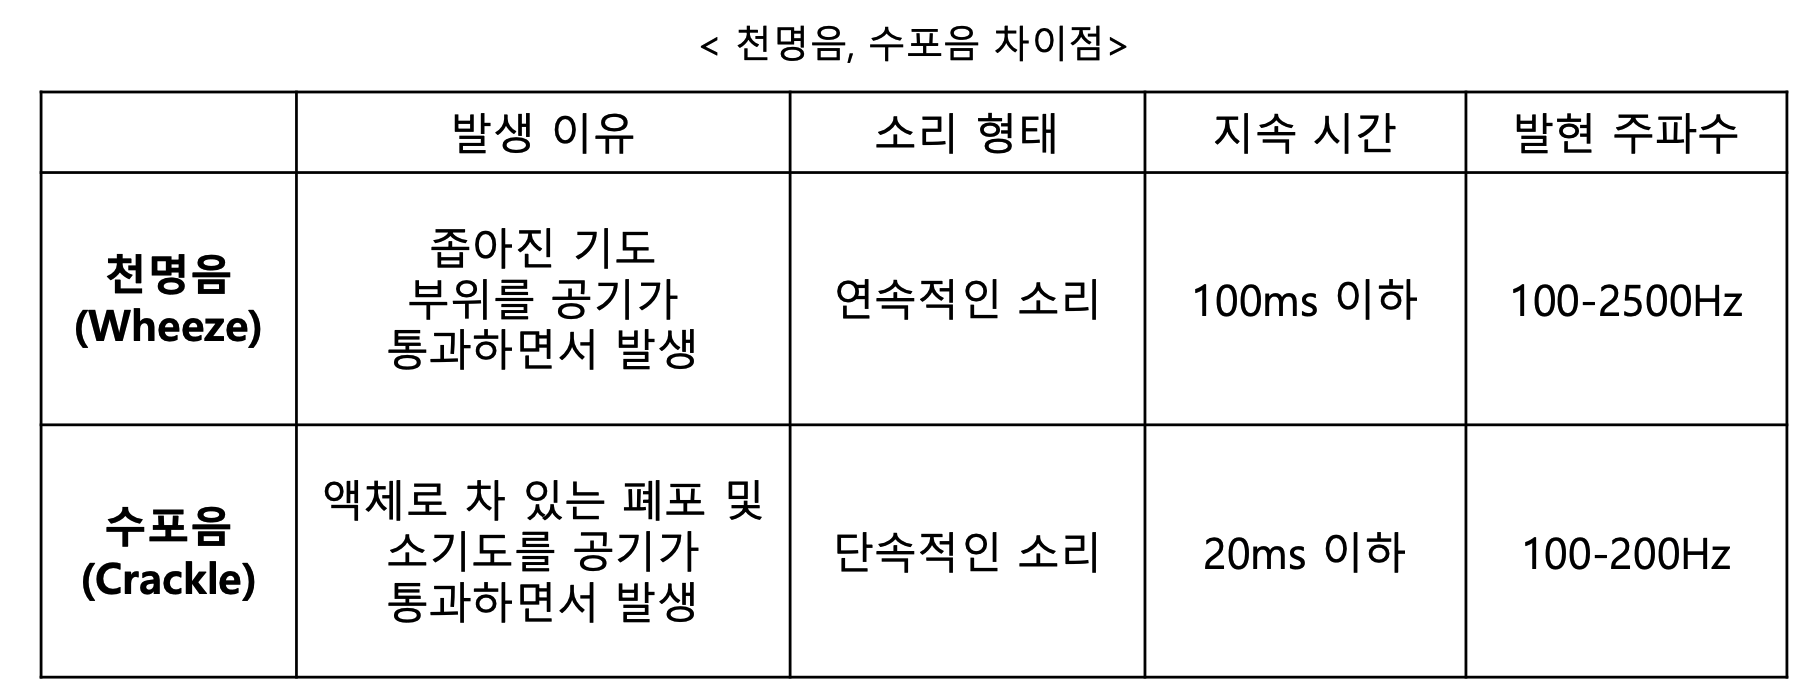

## 1. Data point 하나 로딩

표현 좋은 데이터 이름 : 156_8b3_Ll_mc_AKGC417L.wav

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# root 설정
root = '/content/drive/MyDrive/aiffel/AIFFELthon/1_data/ICBHI_final_database/'
samplefilename = '156_8b3_Ll_mc_AKGC417L.wav'
annotation = '156_8b3_Ll_mc_AKGC417L.txt'
audiopath = root + samplefilename
annopath = root + annotation

print(audiopath)
print(annopath)

/content/drive/MyDrive/aiffel/AIFFELthon/1_data/ICBHI_final_database/156_8b3_Ll_mc_AKGC417L.wav
/content/drive/MyDrive/aiffel/AIFFELthon/1_data/ICBHI_final_database/156_8b3_Ll_mc_AKGC417L.txt


In [3]:
import librosa as lb
import librosa.display
import matplotlib.pyplot as plt

In [4]:
# load

y, sr = librosa.load(audiopath, sr=8000)
print(y.shape, sr)

(160000,) 8000


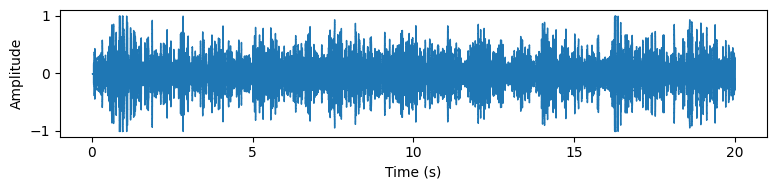

In [5]:
# visualize

plt.figure(figsize=(8, 2))
librosa.display.waveshow(y, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()

In [6]:
import numpy as np

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

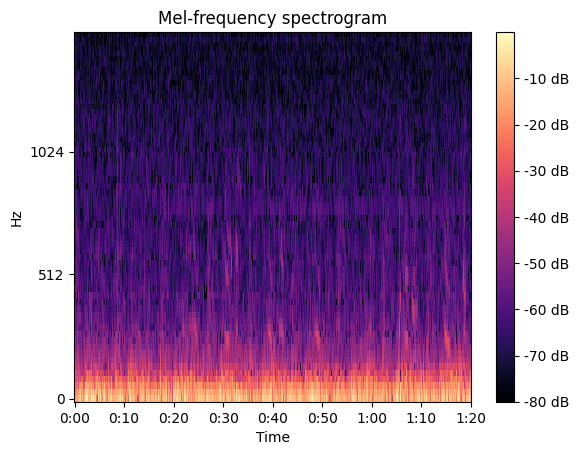

<Figure size 1000x400 with 0 Axes>

In [7]:
# Mel spec
sample_rate = 8000  # 샘플링 레이트
desired_length = 8  # 원하는 길이 (이 값은 melspectrogram 함수에 직접 사용되지 않음)
n_mels = 64  # 멜 필터뱅크의 수
nfft = 256  # FFT 윈도우 크기
hop_length = nfft // 2  # 프레임 사이의 샘플 수
f_max = 2000  # 최대 주파수

S = librosa.feature.melspectrogram(y=y, sr=sample_rate, n_fft=nfft, hop_length=hop_length, n_mels=n_mels, fmax=f_max)
S_dB = librosa.power_to_db(S, ref=np.max)

'''
# 파형 시각화
plt.figure(figsize=(8, 4))
#librosa.display.waveshow(y, sr=sr)
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
'''
fig, ax = plt.subplots()

img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=f_max, ax=ax)

plt.figure(figsize=(10, 4))
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')


### image로 저장 :

In [ ]:
# Mel spectrogram 플로팅
plt.figure(figsize=(10, 4), facecolor='none') # 배경을 투명하게 설정
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=2000)

# 축 레이블과 컬러 바를 없애기
plt.axis('off')
plt.tight_layout()

# 이미지 파일로 저장
output_file_path = '/content/drive/MyDrive/aiffel/AIFFELthon/2_preprocessing/mel_tmp2.jpg'
plt.savefig(output_file_path)

# 그래프 초기화
plt.clf()

print("Conversion complete!")

Conversion complete!


<Figure size 1000x400 with 0 Axes>

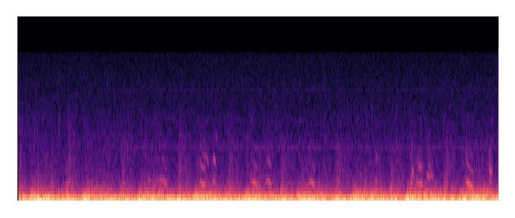

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 파일 경로
image_path = output_file_path  # 여기에 실제 이미지 파일 경로를 입력하세요.

# 이미지 파일 불러오기
img = Image.open(image_path)

# 이미지 화면에 표시
plt.imshow(img)
plt.axis('off')  # 축을 표시하지 않음
plt.show()

In [ ]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
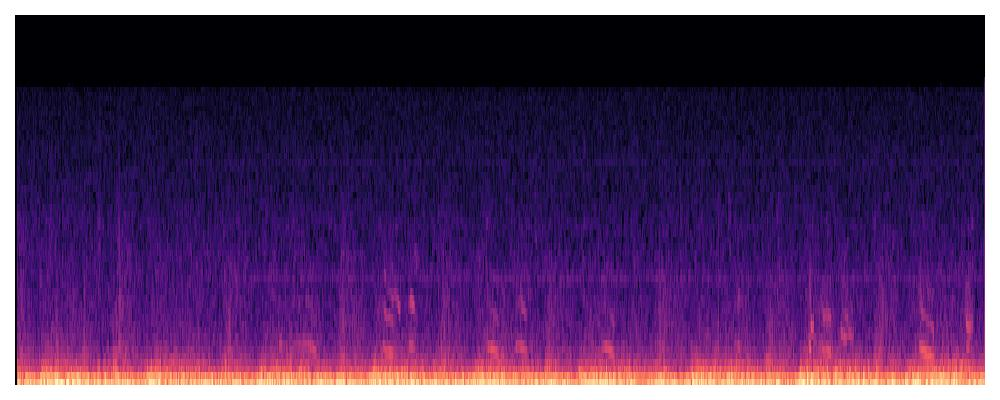

In [ ]:
img_array = np.array(img)
img_array

In [ ]:
save_path = '/content/drive/MyDrive/aiffel/AIFFELthon/2_preprocessing/mel_tmp.png'  # 여기에 원하는 저장 경로와 파일명을 입력하세요.
plt.savefig(save_path)
plt.close()

### mel spectorgram 데이터를 224, 224, 3의 이미지 파일로 저장하는 코드를 짜줘



In [9]:
from PIL import Image

# 오디오 파일 로드 및 Mel Spectrogram 계산
#audio_path = 'path/to/your/audio.wav'  # 오디오 파일 경로
#y, sr = librosa.load(audio_path, sr=None)
#S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
#S_DB = librosa.power_to_db(S, ref=np.max)
output_file_path = '/content/drive/MyDrive/aiffel/AIFFELthon/2_preprocessing/mel_tmp4.jpg'
image_path = output_file_path

# Mel Spectrogram을 이미지로 시각화
plt.figure(figsize=(2.24, 2.24))  # 이미지 크기를 인치 단위로 설정 (224x224 픽셀이 되도록 DPI 조정 필요)
ax = plt.axes([0,0,1,1], frameon=False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.autoscale(tight=True)
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')

# 이미지로 저장하기 전에 buffer에 저장
plt.savefig(output_file_path, dpi=100)  # DPI를 조정하여 대략적인 픽셀 크기 맞춤
plt.close()

# 이미지를 다시 열어서 224x224x3으로 조정
img = Image.open(image_path).convert('RGB')
img = img.resize((224, 224), Image.ANTIALIAS)

# 최종 이미지 파일로 저장
output_file_path2 = '/content/drive/MyDrive/aiffel/AIFFELthon/2_preprocessing/mel_mel4_resize.jpg'

img.save(output_file_path2)

<ipython-input-9-cd8ca3463e70>:25: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((224, 224), Image.ANTIALIAS)


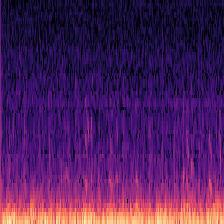

In [10]:
img3 = Image.open(output_file_path2)
img3

In [12]:
type(img3)

PIL.JpegImagePlugin.JpegImageFile

array([[[ 76,  44, 109],
        [ 21,   0,  52],
        [ 17,   0,  46],
        ...,
        [ 15,   8,  50],
        [ 35,  28,  70],
        [ 25,  18,  60]],

       [[ 72,  40, 105],
        [ 27,   0,  58],
        [ 19,   0,  48],
        ...,
        [ 13,   6,  48],
        [ 32,  25,  69],
        [ 21,  14,  56]],

       [[ 67,  35, 100],
        [ 36,   8,  67],
        [ 22,   0,  51],
        ...,
        [ 15,   8,  52],
        [ 32,  24,  71],
        [ 21,  14,  58]],

       ...,

       [[229, 120,  97],
        [227, 128,  99],
        [252, 164, 126],
        ...,
        [255, 212, 156],
        [255, 189, 140],
        [255, 181, 133]],

       [[224, 118,  94],
        [221, 123,  94],
        [248, 163, 124],
        ...,
        [255, 211, 157],
        [255, 189, 139],
        [255, 181, 134]],

       [[224, 120,  95],
        [222, 124,  95],
        [249, 166, 126],
        ...,
        [255, 207, 153],
        [255, 186, 138],
        [255, 179, 132]]], dtype=uint8)
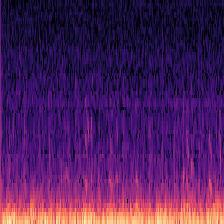

In [13]:
img_array = np.array(img3)
img_array

In [ ]:
img_array.shape

(224, 224, 3)

### txt 불러와서 df로 정렬,비율 계산. 좌표값 설정

In [14]:
annopath

'/content/drive/MyDrive/aiffel/AIFFELthon/1_data/ICBHI_final_database/156_8b3_Ll_mc_AKGC417L.txt'

In [52]:
import pandas as pd

anno_df = pd.read_csv(annopath,
               sep='\t',
               names = ['start', 'end', 'crackles', 'wheezes'])
anno_df

,start,end,crackles,wheezes
0,1.935,4.185,1,0
1,4.185,6.566,1,1
2,6.566,8.601,1,1
3,8.601,10.839,1,1
4,10.839,13.185,1,1
5,13.185,15.423,1,1
6,15.423,17.613,1,1
7,17.613,19.946,1,1


In [ ]:
wheeze_minHz = 100
wheeze_maxHz = 2500
crackle_minHz = 100
crackle_maxHz = 200

In [ ]:
total_Hz = 2000
total_time = 20

In [ ]:
a = 2000/224
b = round(a)

In [ ]:
start = df['start'][0]
end = df['end'][0]


In [ ]:
t1 = round(start)
t2 = round(end)

print(t1, t2)

2 4


x축이 20초, y축이 2000Hz인 mel spectorgram이 있어. 이걸 224,224,3의 이미지로 변환하는데, 비율에 맞는 bounding box 좌표를 지정해주고 싶어.

3.734초부터 5.312초까지, 100Hz에서 200Hz까지가 지정해주고싶은 박스 좌표야.

### 이 mel spectogram으로 224,224,3의 image로 바꿀 때 비율대로 바꾸고 싶으면 어떻게 코드를 써야할까?


In [ ]:
x_start = (start / 20) * 224 (0~1) x_1 = 0.2 , y_1 = 0.9
x_end = (end / 20) * 224

y_start = (1 - (crackle_maxHz / 2000)) * 224
y_end = (1 - (crackle_minHz / 2000)) * 224

print(x_start, x_end, y_start, y_end)

21.672 46.872 201.6 212.79999999999998


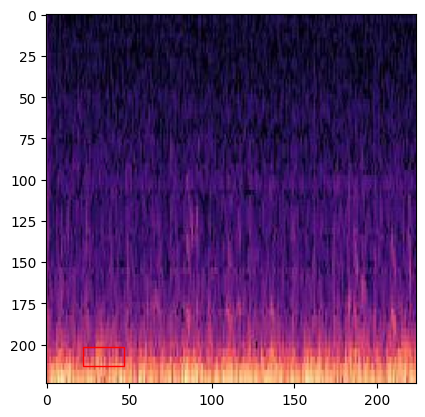

In [ ]:
import matplotlib.patches as patches

# 시각화를 위한 기본 설정
fig, ax = plt.subplots()
ax.imshow(img3)

# bounding box 추가 (Rectangle 사용)
rect = patches.Rectangle((x_start, y_start), x_end - x_start, y_end - y_start, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.show()

### 3/10 여기까지함

### 3/11

### 실제 바운딩박스 여러개 쳐보고 시각화

```python
root = '/content/drive/MyDrive/aiffel/AIFFELthon/1_data/ICBHI_final_database/'
samplefilename = '156_8b3_Ll_mc_AKGC417L.wav'
annotation = '156_8b3_Ll_mc_AKGC417L.txt'
audiopath = root + samplefilename
annopath = root + annotation

print(audiopath)
print(annopath)

```

```224 image path : output_file_path2```


In [53]:
anno_df

,start,end,crackles,wheezes
0,1.935,4.185,1,0
1,4.185,6.566,1,1
2,6.566,8.601,1,1
3,8.601,10.839,1,1
4,10.839,13.185,1,1
5,13.185,15.423,1,1
6,15.423,17.613,1,1
7,17.613,19.946,1,1


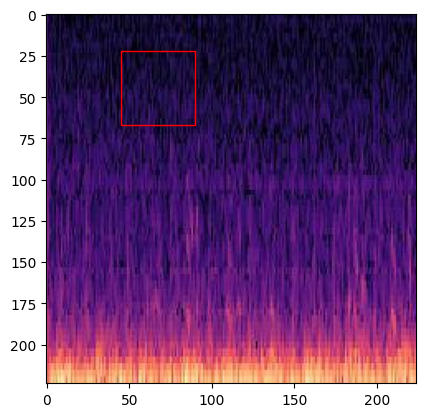

In [18]:
# GPT
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def plot_bounding_box(image_path, x_start, x_end, y_start, y_end):
    # 이미지 로드
    img = Image.open(image_path)
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    # 바운딩 박스의 너비와 높이 계산
    box_width = (x_end - x_start) * img.width
    box_height = (y_end - y_start) * img.height

    # 바운딩 박스 생성 및 추가
    rect = patches.Rectangle((x_start * img.width, y_start * img.height), box_width, box_height, linewidth=1, edgecolor='r', facecolor='none')
                          # (               (x_1 , y_1)                 , b_w      , b_h       , 라인 크기    , 라인 색        , ?               )
    ax.add_patch(rect)

    plt.show()



# 예시 사용법
image_path = output_file_path2
x_start, x_end = 0.2, 0.4  # 예시 정규화된 좌표
y_start, y_end = 0.1, 0.3
plot_bounding_box(image_path, x_start, x_end, y_start, y_end)


In [ ]:
'''
annotation dataframe을 순차적으로 읽으면서
start, end 값을 비율로 바꿔준 값 반환
'''




In [54]:
duration = 20
maxHz = 2000

# x 좌표 정규화
x_start_norm = start / duration  # 0~1 사이의 값
x_end_norm = end / duration      # 0~1 사이의 값

# y 좌표 정규화
y_start_norm = 1 - (crackle_maxHz / maxHz)
y_end_norm = 1 - (crackle_minHz / maxHz)

In [55]:
anno_df

,start,end,crackles,wheezes
0,1.935,4.185,1,0
1,4.185,6.566,1,1
2,6.566,8.601,1,1
3,8.601,10.839,1,1
4,10.839,13.185,1,1
5,13.185,15.423,1,1
6,15.423,17.613,1,1
7,17.613,19.946,1,1


In [25]:
print(anno_df['start'][0])
print(anno_df['end'][0])

1.935
4.185


In [36]:
anno_df.shape[0]

8

In [65]:
duration = 20
maxHz = 2000
wheeze_minHz = 100
wheeze_maxHz = 2000 # 2500
crackle_minHz = 100
crackle_maxHz = 200

n = 0

for i in range(anno_df.shape[0]):
    print('idx = ', n)
    start, end = anno_df['start'][i], anno_df['end'][i]
    print('start: ', start, '\t', '\t', 'end: ', end)

    print('\t', 'crackles: ', anno_df['crackles'][i], '\t', 'wheezes: ', anno_df['wheezes'][i])

    # x 좌표 정규화
    x_start_norm = start / duration  # 0~1 사이의 값
    x_end_norm = end / duration      # 0~1 사이의 값
    print('x좌표')
    print('\t', 'x_start_norm: ', x_start_norm, '\t', 'x_end_norm: ', x_end_norm)

    # y 좌표 정규화
    if anno_df['crackles'][i] == 1:
        yc_start_norm = 1 - (crackle_maxHz / maxHz) # maxHz -> image의 세로값으로 바꿔줘야함?
        yc_end_norm = 1 - (crackle_minHz / maxHz)

    elif anno_df['crackles'][i] == 0:
        yc_start_norm = None
        yc_end_norm = None

    if anno_df['wheezes'][i] == 1:
        yw_start_norm = 1 - (wheeze_maxHz / maxHz)
        yw_end_norm = 1 - (wheeze_minHz / maxHz)

    elif anno_df['wheezes'][i] == 0:
        yw_start_norm = None
        yw_end_norm = None

    else:
        continue
    print('y좌표')
    print('\t', 'crackles ||', '\t', 'yc_start_norm: ', yc_start_norm, '\t', 'yc_end_norm: ', yc_end_norm)
    print('\t', 'wheezes  ||', '\t', 'yw_start_norm: ', yw_start_norm, '\t', 'yw_end_norm: ', yw_end_norm)

    n += 1
    print('-'*70)





idx =  0
start:  1.935 	 	 end:  4.185
	 crackles:  1 	 wheezes:  0
x좌표
	 x_start_norm:  0.09675 	 x_end_norm:  0.20925
y좌표
	 crackles || 	 yc_start_norm:  0.9 	 yc_end_norm:  0.95
	 wheezes  || 	 yw_start_norm:  None 	 yw_end_norm:  None
----------------------------------------------------------------------
idx =  1
start:  4.185 	 	 end:  6.566
	 crackles:  1 	 wheezes:  1
x좌표
	 x_start_norm:  0.20925 	 x_end_norm:  0.3283
y좌표
	 crackles || 	 yc_start_norm:  0.9 	 yc_end_norm:  0.95
	 wheezes  || 	 yw_start_norm:  0.0 	 yw_end_norm:  0.95
----------------------------------------------------------------------
idx =  2
start:  6.566 	 	 end:  8.601
	 crackles:  1 	 wheezes:  1
x좌표
	 x_start_norm:  0.3283 	 x_end_norm:  0.43005000000000004
y좌표
	 crackles || 	 yc_start_norm:  0.9 	 yc_end_norm:  0.95
	 wheezes  || 	 yw_start_norm:  0.0 	 yw_end_norm:  0.95
----------------------------------------------------------------------
idx =  3
start:  8.601 	 	 end:  10.839
	 crackles:  1 	 wheez

In [81]:
n = 0
start = []
end = []
for idx, row in anno_df.iterrows():
    print('idx =', idx, '='*50)

    print(row)
    #print(type(row))
    #print(row[0])
    #print(row[1])
    #print(row[2])
    #print(row[3])

    start.append(row[0])
    end.append(row[1])
    n += 1
    print(n)

print('start = ', start)
print('end = ', end)


##이렇게 리스트 만들어 놨고, 이제 이 리스트로 이미지에 적용시킬 normalize된 바운딩박스 좌표들 튜플로 반환하는 방법 고민 _ 3/11 23:35.

idx = 0 ==================================================
start       1.935
end         4.185
crackles    1.000
wheezes     0.000
Name: 0, dtype: float64
1
idx = 1 ==================================================
start       4.185
end         6.566
crackles    1.000
wheezes     1.000
Name: 1, dtype: float64
2
idx = 2 ==================================================
start       6.566
end         8.601
crackles    1.000
wheezes     1.000
Name: 2, dtype: float64
3
idx = 3 ==================================================
start        8.601
end         10.839
crackles     1.000
wheezes      1.000
Name: 3, dtype: float64
4
idx = 4 ==================================================
start       10.839
end         13.185
crackles     1.000
wheezes      1.000
Name: 4, dtype: float64
5
idx = 5 ==================================================
start       13.185
end         15.423
crackles     1.000
wheezes      1.000
Name: 5, dtype: float64
6
idx = 6 ======================================

In [ ]:
# return으로 (x_start, x_end, y_start, y_end) -> 0 ~ 1


def tmp(df):
    ls = []
    duration = 20 # 가로(x)
    maxHz = 2000  # 세로(y)
    wheeze_minHz = 100
    wheeze_maxHz = 2000 # 2500
    crackle_minHz = 100
    crackle_maxHz = 200

    for _, row in df.iterrows():









    x_start = 0
    x_end = 0
    y_start = 0
    y_end = 0


    pass







### 위에서 만든 박스를 레이블정보로?

# tmp

In [ ]:
S

array([[2.4239837e-14, 2.2797048e-14, 3.7588161e-01, ..., 6.6394529e+00,
        5.9022198e+00, 2.4468029e+00],
       [5.9571548e-15, 1.3244472e-14, 2.6783952e-01, ..., 1.6209000e+00,
        6.5724558e-01, 5.3222829e-01],
       [2.4993454e-16, 8.9209192e-16, 9.3920022e-02, ..., 2.5837263e-01,
        4.8707686e-02, 3.5574548e-02],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
S_dB

array([[-80.      , -80.      , -22.336765, ...,  -9.865953, -10.377123,
        -14.201286],
       [-80.      , -80.      , -23.808529, ..., -15.989714, -19.91    ,
        -20.826298],
       [-80.      , -80.      , -28.359695, ..., -23.964811, -31.211302,
        -32.575882],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)

In [ ]:
img

In [ ]:
type(img)

matplotlib.collections.QuadMesh

In [ ]:
print(type(S))
print(S.shape)
print(S_dB.shape)

<class 'numpy.ndarray'>
(64, 1251)
(64, 1251)


### txt annotation 붙이기

In [ ]:
import pandas as pd

In [ ]:
# txt annotation df에 저장

df = pd.read_csv(annopath,
               sep='\t',
               names = ['start', 'end', 'crackles', 'weezels'])
df

,start,end,crackles,weezels
0,1.935,4.185,1,0
1,4.185,6.566,1,1
2,6.566,8.601,1,1
3,8.601,10.839,1,1
4,10.839,13.185,1,1
5,13.185,15.423,1,1
6,15.423,17.613,1,1
7,17.613,19.946,1,1


In [ ]:
def getPureSample(raw_data, start, end, sr=22050):

    '''
    Takes a numpy array and spilts its using "start and end args"

    raw_data: "numpy array" of audio sample
    start   : time
    end     : time
    sr      : sampling_rate
    mode    : mono/stereo

    return : rawdata를 호흡 주기로 잘라서 리턴
    '''

    max_ind = len(raw_data) # 원본 데이터
    # start/end time * sample rate(초당 sample 수)
    # 함수에 입력된 해당 파일의 최대 길이까지 잘라줌
    start_ind = min(int(start * sr), max_ind) # 시작 시간 x sample rate
    end_ind = min(int(end * sr), max_ind)

    return raw_data[start_ind: end_ind]

### Paskal VOC


In [ ]:
data_list = label_data_list.to_dict('records')
print(data_list[1])

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import xml.etree.ElementTree as ET
from xml.dom import minidom

# 이미지 파일 경로
image_path = '/content/mel_spectrogram.png'

# 객체의 바운딩 박스 좌표 (좌측 상단과 우측 하단 좌표)


for i in range (len(data_list)) :
  # data_list 예시
  if data_list[i]['crackles'] == 1 and data_list[i]['wheezes'] == 0:
      class_labels = ['crackles']
      bboxes = [[(100, 100), (200, 200)]]
  elif data_list[i]['crackles'] == 0 and data_list[i]['wheezes'] == 1:
      class_labels = ['wheezes']
      bboxes = [[(300, 300), (400, 400)]]
  elif data_list[i]['crackles'] == 1 and data_list[i]['wheezes'] == 1:
      class_labels = ['crackles', 'wheezes']
      bboxes = [[(100, 100), (200, 200)], [(300, 300), (400, 400)]]
  else:
      class_labels = []
      bboxes =[]

# XML 파일 작성
def create_xml(image_path, bboxes, data_list):
    for data in data_list:
        root = ET.Element("annotation")

        # 이미지 파일명
        filename = ET.SubElement(root, "filename")
        filename.text = image_path.split('/')[-1]

        # 크기 정보
        size = ET.SubElement(root, "size")
        width, height = cv2.imread(image_path).shape[:2]
        width_element = ET.SubElement(size, "width")
        width_element.text = str(width)
        height_element = ET.SubElement(size, "height")
        height_element.text = str(height)

        # 객체 정보
        for i, bbox in enumerate(bboxes):
            obj = ET.SubElement(root, "object")
            name = ET.SubElement(obj, "name")
            name.text = class_labels[i]
            bbox_element = ET.SubElement(obj, "bndbox")
            xmin, ymin = bbox[0]
            xmax, ymax = bbox[1]
            xmin_element = ET.SubElement(bbox_element, "xmin")
            xmin_element.text = str(xmin)
            ymin_element = ET.SubElement(bbox_element, "ymin")
            ymin_element.text = str(ymin)
            xmax_element = ET.SubElement(bbox_element, "xmax")
            xmax_element.text = str(xmax)
            ymax_element = ET.SubElement(bbox_element, "ymax")
            ymax_element.text = str(ymax)

        xmlstr = minidom.parseString(ET.tostring(root)).toprettyxml(indent="   ")
        with open(image_path[:-4] + '_crackles_' + str(data['crackles']) + '.xml', "w") as f:
            f.write(xmlstr)

# 이미지에 바운딩 박스 그리기
image = cv2.imread(image_path)
for bbox in bboxes:
    cv2.rectangle(image, bbox[0], bbox[1], (0, 255, 0), 2)

# 이미지 표시 및 저장
cv2_imshow(image)
cv2.imwrite(image_path[:-4] + '_annotated.jpg', image)

# XML 파일 작성
create_xml(image_path, bboxes, data_list)


In [ ]:
import os

tmp = os.getenv('HOME')
print(tmp)

/root


In [ ]:
!ls
!cd ..
!ls

drive  sample_data
drive  sample_data


In [ ]:
from PIL import Image, ImageDraw
